In [84]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import imblearn
from collections import Counter
from datetime import datetime
from imblearn.over_sampling import SMOTE

In [142]:
def timer(start_time=None):
    '''
    Timer function to calculate runnig time for a block of statements
    start_time : Time at which staments are excuted
    '''
    if start_time is None:
        return datetime.now()
    else:
        elapsed_time = (datetime.now()-start_time).seconds
        thour, tsec = divmod(elapsed_time, 3600)
        tmin, tsec = divmod(tsec, 60)
        print(f"Time taken: {thour}hr {tmin}min {tsec}s")

In [143]:
# Train, test datset paths
train_set_path = "./dataset/train_s3TEQDk.csv"
test_set_path = "dataset/test_mSzZ8RL.csv"

In [144]:
# Reading dataset into dataframe
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)
train_set.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [145]:
# Getting insights of Dataset
train_set.info(), train_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


(None, (245725, 11))

In [146]:
test_set.info(), test_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


(None, (105312, 10))

## **Visualizing features to check data distribution**

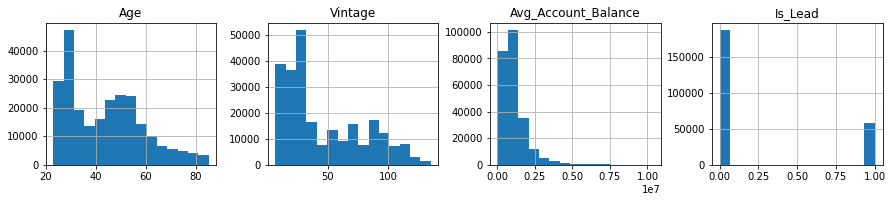

In [49]:
numerical = ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']
train_set[numerical].hist(bins=15, figsize=(15,6), layout=(2,4));

## **Removing NAN values using impute strategy**

In [148]:
def impute_nan_values(df, colName):
    
    df[colName+"_imputed"] = np.where(df[colName].isnull(), 1, 0)
    mode_cat = df[colName].mode()[0]
    df[colName].fillna(mode_cat, inplace=True)
    
categorical = ['Gender', 'Region_Code', 'Occupation', 'Credit_Product', 'Is_Active']
impute_nan_values(train_set, categorical[3])
impute_nan_values(test_set, categorical[3])
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ID                      245725 non-null  object
 1   Gender                  245725 non-null  object
 2   Age                     245725 non-null  int64 
 3   Region_Code             245725 non-null  object
 4   Occupation              245725 non-null  object
 5   Channel_Code            245725 non-null  object
 6   Vintage                 245725 non-null  int64 
 7   Credit_Product          245725 non-null  object
 8   Avg_Account_Balance     245725 non-null  int64 
 9   Is_Active               245725 non-null  object
 10  Is_Lead                 245725 non-null  int64 
 11  Credit_Product_imputed  245725 non-null  int32 
dtypes: int32(1), int64(4), object(7)
memory usage: 21.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data col

(None, None)

## **Visualizing Corelation Matrix** 

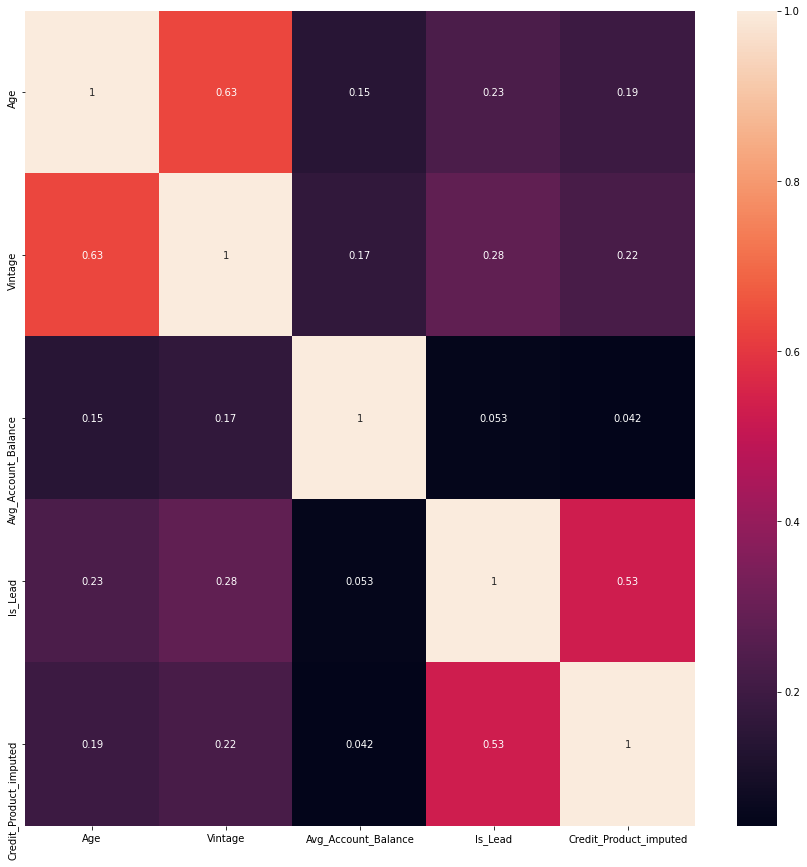

In [55]:
cols = list(range(12))
fig, ax = plt.subplots(figsize=(15,15))
correlation = train_set.iloc[:, cols].corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns, annot=True)
plt.savefig("Correlation Matrix of trainset.png")

`As we can see 'age' and 'vintage' showing a relatively high correlation. My approach will be to drop 'age' column.`

In [149]:
train_set.drop(['Age'], axis=1, inplace=True)
train_set.shape

(245725, 11)

In [150]:
test_set.drop(['Age'], axis=1, inplace=True)
test_set.shape

(105312, 10)

In [151]:
# Extracting target variable
y = train_set['Is_Lead']
train_set.drop('Is_Lead', axis=1, inplace=True)

In [152]:
test_train_set = pd.concat([train_set, test_set], ignore_index=True)
test_train_set.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_imputed
0,NNVBBKZB,Female,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,RG282,Salaried,X1,33,No,886787,No,0


### **Label Encoding Categorical Variables**

In [153]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [154]:
onehotencoding_cols = ['Gender', 'Is_Active', 'Occupation', 'Credit_Product']# 'Channel_Code'
encoded_col = pd.DataFrame(onehotencoder.fit_transform(test_train_set[onehotencoding_cols]).toarray())
encoded_col

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
351032,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
351033,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
351034,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
351035,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [155]:
#Removing already onehotencoded categorical columns
test_train_set = test_train_set.drop(onehotencoding_cols, axis=1)

In [156]:
#Joining new one hot encoded columns to dataframe
test_train_set = test_train_set.join(encoded_col)

In [157]:
# Removing other columns which are not important
test_train_set = test_train_set.drop(['Region_Code', "Channel_Code"], axis=1)

In [158]:
test_train_set.head()

,ID,Vintage,Avg_Account_Balance,Credit_Product_imputed,0,1,2,3,4,5,6,7,8,9
0,NNVBBKZB,43,1045696,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,IDD62UNG,32,581988,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,HD3DSEMC,26,1484315,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,BF3NC7KV,19,470454,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TEASRWXV,33,886787,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [159]:
# After preprocessing dataset, again splitting into test and train set for trainig purpose
test = test_train_set.iloc[245725:, :]
train = test_train_set.iloc[:245725, :]
train = train.drop(['ID'], axis=1)
test.shape, train.shape, y.shape

((105312, 14), (245725, 13), (245725,))

# Performing SMOTE oversampling to balance data 
- Accuracy improved on provided testdata, but when evaluated on unseen data accuracy decreased, hence not using in final submission

In [25]:
# oversample = SMOTE()

In [26]:
# X, y = oversample.fit_resample(train, y)

## **Model Training**

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [161]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((147435, 13), (147435,), (98290, 13), (98290,))

In [162]:
# model = RandomForestClassifier(n_estimators=150)
# model = GradientBoostingClassifier(loss='exponential')
model =  XGBClassifier()
# model = svm.SVC()

## Hyperparameter tuning

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
params={
    "learning_rate"    : [0.05,0.1, 0.3,0.35] ,
    "max_depth"        : [ 12, 15],
    "n_estimators": [100, 150, 200]
}

In [165]:
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring="roc_auc", n_jobs=-1, cv=5)

In [ ]:
strt_timer = timer()
grid_search.fit(x_train, y_train.ravel())
timer(strt_timer)

In [ ]:
grid_search.best_estimator_

In [ ]:
accuracy = grid_search.best_score_
accuracy

In [ ]:
grid_tuned_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
grid_tuned_model.fit(x_train, y_train.ravel())

In [ ]:
# inferencing on test split
y_pred = grid_tuned_model.predict(x_test)
y_pred

## **Classification report on test split**

In [ ]:
print(metrics.classification_report(y_pred, y_test))
print("roc_auc score:", metrics.roc_auc_score(y_pred, y_test))

## **Making prediction for test dataset provided**

In [ ]:
ID = test['ID']
eval = test.drop(['ID'], axis=1)

In [ ]:
eval_pred = grid_tuned_model.predict_proba(eval)
eval_pred

In [ ]:
out_df = pd.DataFrame({"ID":ID, "Is_Lead":eval_pred[:,1]})
out_df.head()

In [ ]:
out_df.to_csv("output/xgbClassifier_with_gridSearchCV.csv", index=False, header=True)